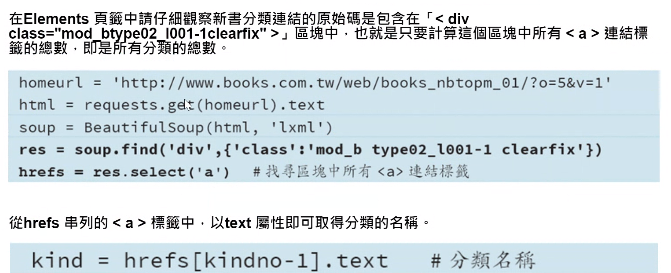

In [2]:
import requests
from bs4 import BeautifulSoup

kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')

res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')
print(hrefs)

[<a href="https://www.books.com.tw/web/books_nbtopm_01/?loc=P_0003_001">文學小說</a>, <a href="https://www.books.com.tw/web/books_nbtopm_02/?loc=P_0003_002">商業理財</a>, <a href="https://www.books.com.tw/web/books_nbtopm_03/?loc=P_0003_003">藝術設計</a>, <a href="https://www.books.com.tw/web/books_nbtopm_04/?loc=P_0003_004">人文史地</a>, <a href="https://www.books.com.tw/web/books_nbtopm_05/?loc=P_0003_005">社會科學</a>, <a href="https://www.books.com.tw/web/books_nbtopm_07/?loc=P_0003_006">心理勵志</a>, <a href="https://www.books.com.tw/web/books_nbtopm_12/?loc=P_0003_007">宗教命理</a>, <a href="https://www.books.com.tw/web/books_nbtopm_06/?loc=P_0003_008">自然科普</a>, <a href="https://www.books.com.tw/web/books_nbtopm_08/?loc=P_0003_009">醫療保健</a>, <a href="https://www.books.com.tw/web/books_nbtopm_09/?loc=P_0003_010">飲食</a>, <a href="https://www.books.com.tw/web/books_nbtopm_10/?loc=P_0003_011">生活風格</a>, <a href="https://www.books.com.tw/web/books_nbtopm_11/?loc=P_0003_012">旅遊</a>, <a href="https://www.books.com.

In [3]:
kind=hrefs[kindno-1].text
print(kind)
kind=hrefs[5-1].text
print(kind)

文學小說
社會科學


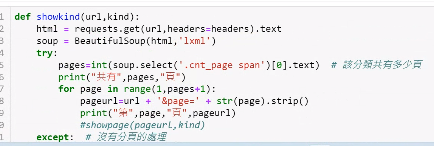

In [28]:
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            print("第",page,"頁:",pageurl)
    except:
        print("共1頁")
        
showkind("https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1",1)

共有 6 頁
第 1 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=1
第 2 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=2
第 3 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=3
第 4 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=4
第 5 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=5
第 6 頁: https://www.books.com.tw/web/books_nbtopm_05?o=5&v=1&page=6


In [79]:
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            print("第",page,"頁:",pageurl)
    except:
        print("共1頁")
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
else:
    print("分類不存在")

請輸入要下載的分類1
下載的分類編號:1 分類名稱:文學小說
分類網址: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1
共有 6 頁
第 1 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=1
第 2 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=2
第 3 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=3
第 4 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=4
第 5 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=5
第 6 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=6


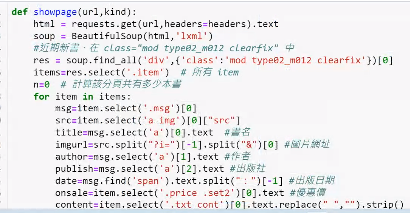

In [83]:
def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    item=res.select('.item')
    for item in item:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        title=msg.select('a')[0].text
        print('書名:',title)
        author=msg.select('a')[1].text
        print('作者:',author)
        publish=msg.select('a')[2].text
        print('出版社:',publish)
        data=msg.find('span').text.split("：")[-1] #:是全形
        print('出版日期:',data)
        onsale=item.select('.price .set2')[0].text
        print(onsale)
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        print('內容:',content)
        print('-'*30)
        listdata=[kind,title,imgurl,author,publish,date,onsale,content]
        list1.append(listdata)
        

In [73]:
showpage('https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1',1)

書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
書名: 偽魚販指南
作者: 林楷倫
出版社: 寶瓶文化
出版日期: 2022/03/27
優惠價：79折 277元
內容: 我以為洗去身上的魚味，
就能變成不一樣的人。
但魚鱗長年緊附，
拔扯下來，皮膚已是不同的顏色。
▍林榮三文學獎、時報文學獎、台北文學獎得主▍
▍魚販林楷倫首部非虛構作品▍
▍天未亮的魚市，是千百...more
------------------------------
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★2022年本屋大賞第5名★

★博客來5月選書★

有一種「惡意」，比殺人更深刻，

如果能爭取到更好的未來，

你，願意「說謊」嗎？

一場絕對猜不到凶手的沉浸式心理戰
日本全國書店員...more
------------------------------
書名: 在說出再見之前【百萬暢銷小說《在咖啡冷掉之前》迸淚續作】
作者: 川口俊和
出版社: 悅知文化
出版日期: 2022/04/27
優惠價：79折 284元
內容: 暢銷台、日、美、英、義等34國、
誠品•博客來•金石堂年度百大、
銷售突破140萬冊之本屋賞入圍作品、
有村架純主演電影原著小說、
《在咖啡冷掉之前

作者: 一穂ミチ
出版社: 尖端
出版日期: 2022/05/04
優惠價：79折 284元
內容: 一個個家庭組成的小小世界，外人難窺其全貌──
你認為的，可能只是誤解；你看到的，可能只是表象。
深刻描繪「家庭」的喜怒哀樂、扭曲異常，共鳴度百分百的故事。
★2022年本屋大賞...more
------------------------------
書名: 今天天氣不錯，我打算把上司幹掉
作者: 夕鷺叶
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 253元
內容: 引爆熱烈話題 日本熱賣緊急再版！
好希望有人可以幫我殺了上司……
那闇黑的欲望，用本書實現吧！
獻給所有在公司兢兢業業努力的上班族
好不容易進入憧憬公司的玲美，卻遭暗黑上司瘋狂找碴，夜夜...more
------------------------------
書名: 連鎖綁架
作者: 亞德里安．麥金提
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 371元
內容: 救回自己小孩的唯一方法，就是綁架別人的小孩。


這部宛若夢魘的小說刺激度與原創性爆表！令人久久無法忘懷。──史蒂芬．金

 

某個尋常早晨，瑞秋．克連恩把女兒凱莉送到公...more
------------------------------
書名: 世界
作者: 南派三叔
出版社: 尖端
出版日期: 2022/03/29
優惠價：79折 277元
內容: ▶千萬暢銷《盜墓筆記》作者南派三叔最新力作！全新驚悚系列開端！
▶當當網近30000條評論好評率99.9%
「這個故事失控的速度太快，其間沒有任何可以容我完全接受的機會……我一直試圖降低這個...more
------------------------------
書名: 白魔之塔 (複製簽名版)
作者: 三津田信三
出版社: 瑞昇
出版日期: 2022/04/20
優惠價：79折 411元
內容: 白色的人扭曲著身體，在燈塔上起舞。
被蠢動的森林與洶湧的大海所包圍之地，
依附在此的詭譎之物再次甦醒……
傳說異聞與杳無人煙的偏遠場域，再次交織出襲向人心的無限恐懼。
★複製簽名版，除了有三...more
------------------------------
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社:

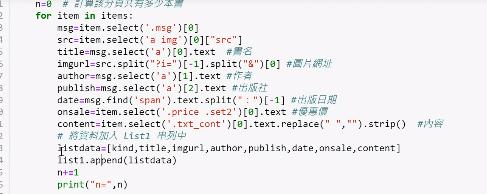

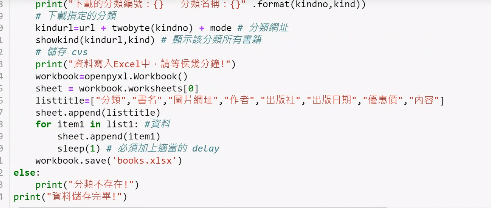

In [91]:
import openpyxl
from time import sleep

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    print("資料寫入Excel中，請稍後")
    workbook=openpyxl.Workbook()
    sheet=workbook.worksheets[0]
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢") 

請輸入要下載的分類1
下載的分類編號:1 分類名稱:文學小說
分類網址: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1
共有 6 頁
書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
n= 1
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
n= 2
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★2022年本屋大賞第5名★

★博客來5月選書★

有一種「惡意」，比殺人更深刻，

如果能爭取到更好的未來，

你，願意「說謊」嗎？

一場絕對猜不到凶手的沉浸式心理戰
日本全國書店員...more
------------------------------
n= 3
書名: 在說出再見之前【百萬暢銷小說《在咖啡冷掉之前》迸淚續作】
作者: 川口俊和
出版社: 悅知文化
出版日期: 2022/04/27
優惠價：79折 284元
內容: 暢銷台、日、美、英、義等34國、
誠品•博客來•金石堂年度百大、
銷售突破140萬冊之本屋賞入圍作品、
有村架純主演電影原著小說、
《在咖啡冷掉之前》作者之最新催淚新作！
 
明知道終將...more
------------------------------
n= 4
書名: 百鬼夜行卷7：吸血鬼
作者: 笭菁
出

作者: 三津田信三
出版社: 瑞昇
出版日期: 2022/04/20
優惠價：79折 411元
內容: 白色的人扭曲著身體，在燈塔上起舞。
被蠢動的森林與洶湧的大海所包圍之地，
依附在此的詭譎之物再次甦醒……
傳說異聞與杳無人煙的偏遠場域，再次交織出襲向人心的無限恐懼。
★複製簽名版，除了有三...more
------------------------------
n= 51
書名: 世界
作者: 南派三叔
出版社: 尖端
出版日期: 2022/03/29
優惠價：79折 277元
內容: ▶千萬暢銷《盜墓筆記》作者南派三叔最新力作！全新驚悚系列開端！
▶當當網近30000條評論好評率99.9%
「這個故事失控的速度太快，其間沒有任何可以容我完全接受的機會……我一直試圖降低這個...more
------------------------------
n= 52
書名: 長公主【5+6套書】完結篇
作者: 墨書白
出版社: 高寶
出版日期: 2022/04/27
優惠價：75折 518元
內容: ※長公主系列完美大結局，收錄三篇繁體中文版獨家番外！
 
晉江年度最具影響力、長據各大排行的殿堂級作者──墨書白 
重生╳權謀古風經典大作
已授權影視版權，火熱籌備中！
榮獲晉江文學城2020年古言組...more
------------------------------
n= 53
書名: 燃燒的凝視【新譯本】：電影《燃火的女孩》經典原著小說
作者: 史蒂芬‧金
出版社: 皇冠
出版日期: 2022/05/09
優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
------------------------------
n= 54
書名: 紙花女子
作者: 多那托．卡瑞西
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------

優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 92
書名: 與妻同袍
作者: 綠光
出版社: 藍海文化
出版日期: 2022/04/20
優惠價：95折 285元
內容: 華衣美服她不愛，唯求夫君年少時舊衣……
錦衣衛都督表示：原來夫人很想被我擁抱？
夫人表示：不，是你想太多！
 
穿越成有皇帝伯伯和侯爺爹當靠山的縣主洛行歌，
她本該過著吃香...more
------------------------------
n= 93
書名: 金玉良醫(四)
作者: 寂寞的清泉
出版社: 東佑
出版日期: 2022/05/04
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 94
書名: 壯美的餘生：楊照談川端康成【限量親簽扉頁版】（日本文學名家十講4）
作者: 楊照
出版社: 麥田
出版日期: 2022/04/02
優惠價：9折 405元
內容: ★限量作者親簽扉頁版★
作為第一位獲頒諾貝爾文學獎的日本作家，
川端康成畢餘生之力追求的「日本之美」是什麼？
【首刷限量贈送文豪雋永書籤】
「餘生」意識背後的歷史脈絡是什麼？
小說書寫如何...more
------------------------------
n= 95
書名: 以薩‧艾西莫夫得意作【獨家套書】：《神也鬥不過愚蠢》+《永恆的終結》
作者: 以撒艾西莫夫
出版社: 鸚鵡螺文化
出版日期: 2022/03/25
優惠價：73折 583元
內容: 《永恆的終結》
 
IT大臣唐鳳：我小時候就是看艾西莫夫長大的。
比爾蓋茲、貝佐斯、伊隆馬斯克，都是艾西莫夫的頭號鐵粉
《永恆的終結》是科幻史上「時空操控」的終極神作
諾蘭...more
------------------------------

內容: ▶千萬暢銷《盜墓筆記》作者南派三叔最新力作！全新驚悚系列開端！
▶當當網近30000條評論好評率99.9%
「這個故事失控的速度太快，其間沒有任何可以容我完全接受的機會……我一直試圖降低這個...more
------------------------------
n= 52
書名: 長公主【5+6套書】完結篇
作者: 墨書白
出版社: 高寶
出版日期: 2022/04/27
優惠價：75折 518元
內容: ※長公主系列完美大結局，收錄三篇繁體中文版獨家番外！
 
晉江年度最具影響力、長據各大排行的殿堂級作者──墨書白 
重生╳權謀古風經典大作
已授權影視版權，火熱籌備中！
榮獲晉江文學城2020年古言組...more
------------------------------
n= 53
書名: 燃燒的凝視【新譯本】：電影《燃火的女孩》經典原著小說
作者: 史蒂芬‧金
出版社: 皇冠
出版日期: 2022/05/09
優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
------------------------------
n= 54
書名: 紙花女子
作者: 多那托．卡瑞西
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------------------------------
n= 55
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社: 皇冠
出版日期: 2022/03/28
優惠價：79折 253元
內容: 最後那一句──讓你的心止不住顫抖！
 
#Twitter14萬粉絲心臟爆擊
#日本上市1個月火速3刷
#140字未滿#寂寞超載
#剛剛好填滿你和這個世界的縫隙
 
「絕對不可以打開喔。」她把信封交給我時如此...more
------------------------------
n= 56

作者: 瑪格莉特．羅傑森
出版社: 三采
出版日期: 2022/04/15
優惠價：79折 332元
內容: 《霍爾的移動城堡》╳《傲慢與偏見》
2022最奇幻浪漫的少女魔法師冒險故事！
「在那座圖書館裡，每一本書都是有生命的；它們會在書架上與你對話，各有個性與想法，甚至很危險……」
 
魔法師都是邪...more
------------------------------
n= 99
書名: 這麼多年 上中下(3冊合售)
作者: 八月長安
出版社: 平裝本
出版日期: 2022/05/03
優惠價：75折 673元
內容: 有一種愛情，叫作陳見夏與李燃。
暌違八年，青春純愛天后八月長安全新作品！
「振華中學四部曲」最終完結篇！
 
這世上，不是所有的人都能相遇，
也不是所有的相遇都能有美好結局……
 
從青澀懵懂到...more
------------------------------
n= 100
第 2 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=2
書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
n= 1
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
n= 2
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★202

優惠價：79折 300元
內容: ──《衛報》2019年度選書──
──榮獲2020年加拿大溫斯頓非文學類寫作獎──
──普立茲獎得主傑克．戴維斯、自然寫作名家羅伯特．麥克法倫盛讚──
一部結合自然寫作、山岳文學、旅遊紀實和回憶錄的詩意之作
...more
------------------------------
n= 45
書名: 你好，這裡是記憶花店
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: 作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，那會是什麼樣的味道？
逝去的人，記憶...more
------------------------------
n= 46
書名: 小小世界【本屋大賞第3名、直木賞入圍作】(博客來獨家封面)
作者: 一穂ミチ
出版社: 尖端
出版日期: 2022/05/04
優惠價：79折 284元
內容: 一個個家庭組成的小小世界，外人難窺其全貌──
你認為的，可能只是誤解；你看到的，可能只是表象。
深刻描繪「家庭」的喜怒哀樂、扭曲異常，共鳴度百分百的故事。
★2022年本屋大賞...more
------------------------------
n= 47
書名: 我沒死，只是變成了掃地機器人
作者: 添田信
出版社: 皇冠
出版日期: 2022/04/26
優惠價：79折 300元
內容: 就算變成一台吸塵器，
我也要保護妳！
 
史上最ㄎㄧㄤ的掃地機器人推理！阿嘉莎．克莉絲蒂獎全體評審跌破眼鏡！
日本Amazon讀者★★★★盛讚好評！
 
第10屆
阿嘉莎．克莉絲蒂...more
------------------------------
n= 48
書名: 今天天氣不錯，我打算把上司幹掉
作者: 夕鷺叶
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 253元
內容: 引爆熱烈話題 日本熱賣緊急再版！
好希望有人可以幫我殺了上司……
那闇黑的欲望，用本書實現吧！
獻給所有在公司兢兢業業努力的上班族
好不容易進入憧憬公司的玲美，卻遭暗黑上司瘋狂找碴，夜夜...more
------------------------------


書名: 站在上天這一邊
作者: 王楨棟
出版社: 九歌
出版日期: 2022/04/28
優惠價：79折 284元
內容: 本書榮獲第十屆全球華文文學星雲獎長篇歷史小說參獎
 
人生就像下圍棋一樣，前面下的一步，會影響到後面人生的走向與方式。
歷史的演變也像下圍棋，下一盤棋的結果，就是一段歷史演變...more
------------------------------
n= 97
書名: 慕南枝一
作者: 吱吱
出版社: 知翎文化
出版日期: 2022/05/05
優惠價：79折 221元
內容: 從被冷落的皇后，到垂簾聽政的太后，
最後被親手養大的幼帝毒死於深宮。
發現自己回到十年前，姜憲夜夜惶恐難安，
她本不欲打草驚蛇的，未料會提前撞見了他──
未來的臨潼王，李謙...more
------------------------------
n= 98
書名: 魔法圖書館的祕密
作者: 瑪格莉特．羅傑森
出版社: 三采
出版日期: 2022/04/15
優惠價：79折 332元
內容: 《霍爾的移動城堡》╳《傲慢與偏見》
2022最奇幻浪漫的少女魔法師冒險故事！
「在那座圖書館裡，每一本書都是有生命的；它們會在書架上與你對話，各有個性與想法，甚至很危險……」
 
魔法師都是邪...more
------------------------------
n= 99
書名: 這麼多年 上中下(3冊合售)
作者: 八月長安
出版社: 平裝本
出版日期: 2022/05/03
優惠價：75折 673元
內容: 有一種愛情，叫作陳見夏與李燃。
暌違八年，青春純愛天后八月長安全新作品！
「振華中學四部曲」最終完結篇！
 
這世上，不是所有的人都能相遇，
也不是所有的相遇都能有美好結局……
 
從青澀懵懂到...more
------------------------------
n= 100
第 3 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=3
書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作

書名: 連鎖綁架
作者: 亞德里安．麥金提
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 371元
內容: 救回自己小孩的唯一方法，就是綁架別人的小孩。


這部宛若夢魘的小說刺激度與原創性爆表！令人久久無法忘懷。──史蒂芬．金

 

某個尋常早晨，瑞秋．克連恩把女兒凱莉送到公...more
------------------------------
n= 50
書名: 白魔之塔 (複製簽名版)
作者: 三津田信三
出版社: 瑞昇
出版日期: 2022/04/20
優惠價：79折 411元
內容: 白色的人扭曲著身體，在燈塔上起舞。
被蠢動的森林與洶湧的大海所包圍之地，
依附在此的詭譎之物再次甦醒……
傳說異聞與杳無人煙的偏遠場域，再次交織出襲向人心的無限恐懼。
★複製簽名版，除了有三...more
------------------------------
n= 51
書名: 世界
作者: 南派三叔
出版社: 尖端
出版日期: 2022/03/29
優惠價：79折 277元
內容: ▶千萬暢銷《盜墓筆記》作者南派三叔最新力作！全新驚悚系列開端！
▶當當網近30000條評論好評率99.9%
「這個故事失控的速度太快，其間沒有任何可以容我完全接受的機會……我一直試圖降低這個...more
------------------------------
n= 52
書名: 長公主【5+6套書】完結篇
作者: 墨書白
出版社: 高寶
出版日期: 2022/04/27
優惠價：75折 518元
內容: ※長公主系列完美大結局，收錄三篇繁體中文版獨家番外！
 
晉江年度最具影響力、長據各大排行的殿堂級作者──墨書白 
重生╳權謀古風經典大作
已授權影視版權，火熱籌備中！
榮獲晉江文學城2020年古言組...more
------------------------------
n= 53
書名: 燃燒的凝視【新譯本】：電影《燃火的女孩》經典原著小說
作者: 史蒂芬‧金
出版社: 皇冠
出版日期: 2022/05/09
優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
----

出版社: 東佑
出版日期: 2022/04/27
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 92
書名: 與妻同袍
作者: 綠光
出版社: 藍海文化
出版日期: 2022/04/20
優惠價：95折 285元
內容: 華衣美服她不愛，唯求夫君年少時舊衣……
錦衣衛都督表示：原來夫人很想被我擁抱？
夫人表示：不，是你想太多！
 
穿越成有皇帝伯伯和侯爺爹當靠山的縣主洛行歌，
她本該過著吃香...more
------------------------------
n= 93
書名: 金玉良醫(四)
作者: 寂寞的清泉
出版社: 東佑
出版日期: 2022/05/04
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 94
書名: 壯美的餘生：楊照談川端康成【限量親簽扉頁版】（日本文學名家十講4）
作者: 楊照
出版社: 麥田
出版日期: 2022/04/02
優惠價：9折 405元
內容: ★限量作者親簽扉頁版★
作為第一位獲頒諾貝爾文學獎的日本作家，
川端康成畢餘生之力追求的「日本之美」是什麼？
【首刷限量贈送文豪雋永書籤】
「餘生」意識背後的歷史脈絡是什麼？
小說書寫如何...more
------------------------------
n= 95
書名: 以薩‧艾西莫夫得意作【獨家套書】：《神也鬥不過愚蠢》+《永恆的終結》
作者: 以撒艾西莫夫
出版社: 鸚鵡螺文化
出版日期: 2022/03/25
優惠價：73折 583元
內容: 《永恆的終結》
 
IT大臣唐鳳：我小時候就是看艾西莫夫長大的。
比爾蓋茲、貝佐斯、伊隆馬斯克，都是艾西莫夫的頭號鐵粉
《永恆的終結》是科幻史上「時空操控」的終極神作
諾蘭...more
-----

書名: 死神第3部門：追憶【作者親簽版，附限量《死神闇夜版透明書籤》】
作者: 晨羽
出版社: 悅知文化
出版日期: 2022/04/11
優惠價：79折 269元
內容: 博客來．誠品．金石堂華文暢銷作家．晨羽
挑戰［幻奇異想］新作，在虛無境地生出一絲溫柔。
──那些過往，能讓自己重生，抑或是走向終結？──
死神第3部門，陰間組織最底層，聚集著一群偷懶的傢伙...more
------------------------------
n= 36
書名: 魂手形：三島屋奇異百物語七
作者: 宮部美幸
出版社: 獨步文化
出版日期: 2022/03/31
優惠價：79折 315元
內容: 「壞結局」變成「好結局」的關鍵，
你知道是什麼嗎？
讓你重新相信小說蘊藏的可能性！
宮部美幸生涯中最偉大的創作計畫
「三島屋奇異百物語」系列最新一集
火焰太鼓、三胞胎兄弟、彼岸擺渡人──...more
------------------------------
n= 37
書名: 小劉醫師．白袍女醫小說套書（村裡來了個暴走女外科【公視戲劇原著】＋花樣女醫白袍叢林生存記）
作者: 劉宗瑀（小劉醫師）
出版社: 時報出版
出版日期: 2022/04/12
優惠價：7折 441元
內容: 村裡來了個暴走女外科
電視劇原著小說重磅出擊！立刻珍藏！
2022年5月7日公共電視首播！
蔡淑臻、朱軒洋、湯志偉、楊麗音──主演
《村裡來了個暴走女外科：偏鄉小醫院的血與骨、...more
------------------------------
n= 38
書名: 星期五的書店：夏天與汽水
作者: 名取佐和子
出版社: 獨步文化
出版日期: 2022/04/30
優惠價：79折 253元
內容: 我們沒辦法改變別人的心，
但自己心裡的大洞，可以自己補起來。
歡迎來到「金曜堂」書店，尋找當下最需要的心靈藥方！
車站書店「金曜堂」的門，是一扇希望之門。
廢棄的地下月台是專屬書庫。
無論...more
------------------------------
n= 39
書名: 沒有信箱的男人
作者: 夏曼‧藍波安
出版社: 聯合文學
出版日期: 2022/04/21
優惠價：79折 300元
內容: 首度從達悟族的視角，對映主流大歴史。
向外來者借貸文字，還原「沒有文字的民族」的創世傳說，
歷時

優惠價：75折 525元
內容: 與《龍馬行》並列的幕末主題顛峰作
大眾文化最膾炙人口的創作主題
自1965年《新選組血風錄》與《燃燒吧！劍》電視劇播出後，土方歲三即成為風靡大眾的歷史偶像人物，至今有近40部小說、電影...more
------------------------------
n= 80
書名: 換個夫君就好命（上）
作者: 若凌
出版社: 狗屋
出版日期: 2022/04/21
優惠價：79折 205元
內容: 總說紅顏薄命，要換夫改命當然力挑上品，
我命由我不由天，這輩子親事自己找，才不枉人生重來！
 
文創風1056《換個夫君就好命》上
「美人配狀元郎」曾經在京中傳為一段佳話，
...more
------------------------------
n= 81
書名: 換個夫君就好命（下）＋（拆封不退）
作者: 若凌
出版社: 狗屋
出版日期: 2022/04/21
優惠價：79折 205元
內容: 能嫁給他為妻，她是滿心歡喜，
不是因為正妃之位有多尊貴，
而是她終於能夠名正言順地站在他身邊……
 
文創風1057《換個夫君就好命》下＋封
誰能想到一枝暗箭埋伏，讓祁辰逸從文...more
------------------------------
n= 82
書名: 向加泰隆尼亞致敬（戰後英國文壇五十大作家喬治•歐威爾反極權主義寫作起點，繁體中文譯本首度問市）
作者: 喬治‧歐威爾
出版社: 貓頭鷹
出版日期: 2022/05/07
優惠價：79折 427元
內容: 若想深入瞭解二十世紀，不可不讀歐威爾
若喜歡《動物農莊》與《一九八四》，那一定不能錯過《向加泰隆尼亞致敬》
◎本書為歐威爾親歷西班牙內戰實錄
◎這場內戰確立了歐威爾反共產、反蘇聯、反極權的寫作...more
------------------------------
n= 83
書名: 瘂弦回憶錄 (平裝)
作者: 瘂弦,辛上邪
出版社: 洪範
出版日期: 2022/03/25
優惠價：79折 300元
內容: 一個時代的舞台
 
《瘂弦回憶錄》是一部刻繪時代的史詩巨著，自河南童年回憶起述，17歲為避內戰隨學校流亡，自此永別父母，離別家鄉，途中從軍來台，由小兵歷練力求上進。長途漫漫，一路隨時代世勢...more
-----------------------------

優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
------------------------------
n= 54
書名: 紙花女子
作者: 多那托．卡瑞西
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------------------------------
n= 55
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社: 皇冠
出版日期: 2022/03/28
優惠價：79折 253元
內容: 最後那一句──讓你的心止不住顫抖！
 
#Twitter14萬粉絲心臟爆擊
#日本上市1個月火速3刷
#140字未滿#寂寞超載
#剛剛好填滿你和這個世界的縫隙
 
「絕對不可以打開喔。」她把信封交給我時如此...more
------------------------------
n= 56
書名: 他從世界的那頭來：2450天，那些旅人寄放在我這的勇氣、信仰和冒險
作者: 賴小馬
出版社: 禾禾文化
出版日期: 2022/04/26
優惠價：79折 277元
內容: //後疫情時代最適合閱讀的旅遊散文//
邁開雙腳才能遇見的遠方，一張沙發卻將世界從遠方迎來

2450天，24國，38座城市，100+背包客

從世界那頭而來
在一座名為宜蘭的小鎮，卸下背包，留下故事……...more
------------------------------
n= 57
書名: 餘地
作者: 顧玉玲
出版社: 印刻
出版日期: 2022/04/11
優惠價：79折 332元
內容: ‧從「我們」出發，從遺忘打撈自我，揭開時間紗布下的傷與痛，與之和解。
痛與記憶的紀事
用漫長跨度的時光，揭開蘊藏在生命中的遺憾與傷害，理解挫傷
童偉格、張亦絢、游靜、韓麗珠 專序
...more
------------------------------

資料儲存完畢


In [90]:
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    item=res.select('.item')
    n=0
    for item in item:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        title=msg.select('a')[0].text
        print('書名:',title)
        author=msg.select('a')[1].text
        print('作者:',author)
        publish=msg.select('a')[2].text
        print('出版社:',publish)
        date=msg.find('span').text.split("：")[-1] #:是全形
        print('出版日期:',date)
        onsale=item.select('.price .set2')[0].text
        print(onsale)
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        print('內容:',content)
        print('-'*30)
        listdata=[kind,title,author,publish,date,onsale,content]
        list1.append(listdata)
        n+=1
        print("n=",n)        
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢")        

請輸入要下載的分類1
下載的分類編號:1 分類名稱:文學小說
分類網址: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1
共有 6 頁
書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
n= 1
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
n= 2
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★2022年本屋大賞第5名★

★博客來5月選書★

有一種「惡意」，比殺人更深刻，

如果能爭取到更好的未來，

你，願意「說謊」嗎？

一場絕對猜不到凶手的沉浸式心理戰
日本全國書店員...more
------------------------------
n= 3
書名: 在說出再見之前【百萬暢銷小說《在咖啡冷掉之前》迸淚續作】
作者: 川口俊和
出版社: 悅知文化
出版日期: 2022/04/27
優惠價：79折 284元
內容: 暢銷台、日、美、英、義等34國、
誠品•博客來•金石堂年度百大、
銷售突破140萬冊之本屋賞入圍作品、
有村架純主演電影原著小說、
《在咖啡冷掉之前》作者之最新催淚新作！
 
明知道終將...more
------------------------------
n= 4
書名: 百鬼夜行卷7：吸血鬼
作者: 笭菁
出

出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------------------------------
n= 55
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社: 皇冠
出版日期: 2022/03/28
優惠價：79折 253元
內容: 最後那一句──讓你的心止不住顫抖！
 
#Twitter14萬粉絲心臟爆擊
#日本上市1個月火速3刷
#140字未滿#寂寞超載
#剛剛好填滿你和這個世界的縫隙
 
「絕對不可以打開喔。」她把信封交給我時如此...more
------------------------------
n= 56
書名: 他從世界的那頭來：2450天，那些旅人寄放在我這的勇氣、信仰和冒險
作者: 賴小馬
出版社: 禾禾文化
出版日期: 2022/04/26
優惠價：79折 277元
內容: //後疫情時代最適合閱讀的旅遊散文//
邁開雙腳才能遇見的遠方，一張沙發卻將世界從遠方迎來

2450天，24國，38座城市，100+背包客

從世界那頭而來
在一座名為宜蘭的小鎮，卸下背包，留下故事……...more
------------------------------
n= 57
書名: 餘地
作者: 顧玉玲
出版社: 印刻
出版日期: 2022/04/11
優惠價：79折 332元
內容: ‧從「我們」出發，從遺忘打撈自我，揭開時間紗布下的傷與痛，與之和解。
痛與記憶的紀事
用漫長跨度的時光，揭開蘊藏在生命中的遺憾與傷害，理解挫傷
童偉格、張亦絢、游靜、韓麗珠 專序
...more
------------------------------
n= 58
書名: 刺與浪：跨世代台灣同志散文讀本
作者: 楊佳嫻
出版社: 麥田
出版日期: 2022/04/30
優惠價：79折 332元
內容: 刺，是刺激、是限制，也是傷痕；浪，是湧動、是淹沒，也是欲望。
台灣第一本同志散文書寫精選，
自1982～2019，橫跨近四十年性別穿脫與生命叩問——
為什麼關於愛，關於家和自己，
要有一

書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
n= 1
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
n= 2
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★2022年本屋大賞第5名★

★博客來5月選書★

有一種「惡意」，比殺人更深刻，

如果能爭取到更好的未來，

你，願意「說謊」嗎？

一場絕對猜不到凶手的沉浸式心理戰
日本全國書店員...more
------------------------------
n= 3
書名: 在說出再見之前【百萬暢銷小說《在咖啡冷掉之前》迸淚續作】
作者: 川口俊和
出版社: 悅知文化
出版日期: 2022/04/27
優惠價：79折 284元
內容: 暢銷台、日、美、英、義等34國、
誠品•博客來•金石堂年度百大、
銷售突破140萬冊之本屋賞入圍作品、
有村架純主演電影原著小說、
《在咖啡冷掉之前》作者之最新催淚新作！
 
明知道終將...more
------------------------------
n= 4
書名: 百鬼夜行卷7：吸血鬼
作者: 笭菁
出版社: 奇幻基地
出版日期: 2022/04/30
優惠價：79折 269元
內容: 博客來、金石堂年度暢銷作家——
華文靈異天后笭菁 百鬼夜行系列
寧靜街頭‧暗夜鐘響‧百鬼夜行‧善惡莫測
馮千

出版日期: 2022/03/31
優惠價：79折 253元
內容: 引爆熱烈話題 日本熱賣緊急再版！
好希望有人可以幫我殺了上司……
那闇黑的欲望，用本書實現吧！
獻給所有在公司兢兢業業努力的上班族
好不容易進入憧憬公司的玲美，卻遭暗黑上司瘋狂找碴，夜夜...more
------------------------------
n= 49
書名: 連鎖綁架
作者: 亞德里安．麥金提
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 371元
內容: 救回自己小孩的唯一方法，就是綁架別人的小孩。


這部宛若夢魘的小說刺激度與原創性爆表！令人久久無法忘懷。──史蒂芬．金

 

某個尋常早晨，瑞秋．克連恩把女兒凱莉送到公...more
------------------------------
n= 50
書名: 白魔之塔 (複製簽名版)
作者: 三津田信三
出版社: 瑞昇
出版日期: 2022/04/20
優惠價：79折 411元
內容: 白色的人扭曲著身體，在燈塔上起舞。
被蠢動的森林與洶湧的大海所包圍之地，
依附在此的詭譎之物再次甦醒……
傳說異聞與杳無人煙的偏遠場域，再次交織出襲向人心的無限恐懼。
★複製簽名版，除了有三...more
------------------------------
n= 51
書名: 世界
作者: 南派三叔
出版社: 尖端
出版日期: 2022/03/29
優惠價：79折 277元
內容: ▶千萬暢銷《盜墓筆記》作者南派三叔最新力作！全新驚悚系列開端！
▶當當網近30000條評論好評率99.9%
「這個故事失控的速度太快，其間沒有任何可以容我完全接受的機會……我一直試圖降低這個...more
------------------------------
n= 52
書名: 長公主【5+6套書】完結篇
作者: 墨書白
出版社: 高寶
出版日期: 2022/04/27
優惠價：75折 518元
內容: ※長公主系列完美大結局，收錄三篇繁體中文版獨家番外！
 
晉江年度最具影響力、長據各大排行的殿堂級作者──墨書白 
重生╳權謀古風經典大作
已授權影視版權，火熱籌備中！
榮獲晉江文學城2020年古言組...more
------------------------------
n= 53
書名: 燃燒的凝視【

出版社: 東佑
出版日期: 2022/05/04
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 94
書名: 壯美的餘生：楊照談川端康成【限量親簽扉頁版】（日本文學名家十講4）
作者: 楊照
出版社: 麥田
出版日期: 2022/04/02
優惠價：9折 405元
內容: ★限量作者親簽扉頁版★
作為第一位獲頒諾貝爾文學獎的日本作家，
川端康成畢餘生之力追求的「日本之美」是什麼？
【首刷限量贈送文豪雋永書籤】
「餘生」意識背後的歷史脈絡是什麼？
小說書寫如何...more
------------------------------
n= 95
書名: 以薩‧艾西莫夫得意作【獨家套書】：《神也鬥不過愚蠢》+《永恆的終結》
作者: 以撒艾西莫夫
出版社: 鸚鵡螺文化
出版日期: 2022/03/25
優惠價：73折 583元
內容: 《永恆的終結》
 
IT大臣唐鳳：我小時候就是看艾西莫夫長大的。
比爾蓋茲、貝佐斯、伊隆馬斯克，都是艾西莫夫的頭號鐵粉
《永恆的終結》是科幻史上「時空操控」的終極神作
諾蘭...more
------------------------------
n= 96
書名: 站在上天這一邊
作者: 王楨棟
出版社: 九歌
出版日期: 2022/04/28
優惠價：79折 284元
內容: 本書榮獲第十屆全球華文文學星雲獎長篇歷史小說參獎
 
人生就像下圍棋一樣，前面下的一步，會影響到後面人生的走向與方式。
歷史的演變也像下圍棋，下一盤棋的結果，就是一段歷史演變...more
------------------------------
n= 97
書名: 慕南枝一
作者: 吱吱
出版社: 知翎文化
出版日期: 2022/05/05
優惠價：79折 221元
內容: 從被冷落的皇后，到垂簾聽政的太后，
最後被親手養大的幼帝毒死於深宮。
發現自己回到十年前，姜憲夜夜惶恐難安，
她本不欲打草驚蛇的，未料會提前撞見了他──
未來的臨潼王，李謙...more
-----------------

書名: 燃燒的凝視【新譯本】：電影《燃火的女孩》經典原著小說
作者: 史蒂芬‧金
出版社: 皇冠
出版日期: 2022/05/09
優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
------------------------------
n= 54
書名: 紙花女子
作者: 多那托．卡瑞西
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------------------------------
n= 55
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社: 皇冠
出版日期: 2022/03/28
優惠價：79折 253元
內容: 最後那一句──讓你的心止不住顫抖！
 
#Twitter14萬粉絲心臟爆擊
#日本上市1個月火速3刷
#140字未滿#寂寞超載
#剛剛好填滿你和這個世界的縫隙
 
「絕對不可以打開喔。」她把信封交給我時如此...more
------------------------------
n= 56
書名: 他從世界的那頭來：2450天，那些旅人寄放在我這的勇氣、信仰和冒險
作者: 賴小馬
出版社: 禾禾文化
出版日期: 2022/04/26
優惠價：79折 277元
內容: //後疫情時代最適合閱讀的旅遊散文//
邁開雙腳才能遇見的遠方，一張沙發卻將世界從遠方迎來

2450天，24國，38座城市，100+背包客

從世界那頭而來
在一座名為宜蘭的小鎮，卸下背包，留下故事……...more
------------------------------
n= 57
書名: 餘地
作者: 顧玉玲
出版社: 印刻
出版日期: 2022/04/11
優惠價：79折 332元
內容: ‧從「我們」出發，從遺忘打撈自我，揭開時間紗布下的傷與痛，與之和解。
痛與記憶的紀事
用漫長跨度的時光，揭開蘊藏在生命中的遺

優惠價：79折 332元
內容: 《霍爾的移動城堡》╳《傲慢與偏見》
2022最奇幻浪漫的少女魔法師冒險故事！
「在那座圖書館裡，每一本書都是有生命的；它們會在書架上與你對話，各有個性與想法，甚至很危險……」
 
魔法師都是邪...more
------------------------------
n= 99
書名: 這麼多年 上中下(3冊合售)
作者: 八月長安
出版社: 平裝本
出版日期: 2022/05/03
優惠價：75折 673元
內容: 有一種愛情，叫作陳見夏與李燃。
暌違八年，青春純愛天后八月長安全新作品！
「振華中學四部曲」最終完結篇！
 
這世上，不是所有的人都能相遇，
也不是所有的相遇都能有美好結局……
 
從青澀懵懂到...more
------------------------------
n= 100
第 3 頁: https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=3
書名: 【博客來獨家限量】你好，這裡是記憶花店（透‧深藍書衣版）
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: ◇◇◇博客來獨家／透‧深藍書衣版◇◇◇
 
作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，...more
------------------------------
n= 1
書名: 歡迎光臨夢境百貨2：找回不再做夢的人
作者: 李美芮
出版社: 寂寞
出版日期: 2022/04/01
優惠價：79折 363元
內容: 如果夢境是人生休息時分的禮物，
為什麼有些人不再入夢？
 
現象級暢銷小說、百萬讀者認證的療癒故事──
 
★系列雙書銷量破百萬冊，啟發韓國書市年度關鍵字「夢」
★首作...more
------------------------------
n= 2
書名: 六個說謊的大學生【博客來獨家書衣版】（2022年本屋大賞第5名）
作者: 淺倉秋成
出版社: 采實文化
出版日期: 2022/05/05
優惠價：79折 340元
內容: ★2022年本屋大賞第5名★

★博客來5月選書★

有一種「惡意」，比殺人更深刻，

作者: 李潔珂
出版社: 臉譜
出版日期: 2022/04/02
優惠價：79折 300元
內容: ──《衛報》2019年度選書──
──榮獲2020年加拿大溫斯頓非文學類寫作獎──
──普立茲獎得主傑克．戴維斯、自然寫作名家羅伯特．麥克法倫盛讚──
一部結合自然寫作、山岳文學、旅遊紀實和回憶錄的詩意之作
...more
------------------------------
n= 45
書名: 你好，這裡是記憶花店
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: 作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，那會是什麼樣的味道？
逝去的人，記憶...more
------------------------------
n= 46
書名: 小小世界【本屋大賞第3名、直木賞入圍作】(博客來獨家封面)
作者: 一穂ミチ
出版社: 尖端
出版日期: 2022/05/04
優惠價：79折 284元
內容: 一個個家庭組成的小小世界，外人難窺其全貌──
你認為的，可能只是誤解；你看到的，可能只是表象。
深刻描繪「家庭」的喜怒哀樂、扭曲異常，共鳴度百分百的故事。
★2022年本屋大賞...more
------------------------------
n= 47
書名: 我沒死，只是變成了掃地機器人
作者: 添田信
出版社: 皇冠
出版日期: 2022/04/26
優惠價：79折 300元
內容: 就算變成一台吸塵器，
我也要保護妳！
 
史上最ㄎㄧㄤ的掃地機器人推理！阿嘉莎．克莉絲蒂獎全體評審跌破眼鏡！
日本Amazon讀者★★★★盛讚好評！
 
第10屆
阿嘉莎．克莉絲蒂...more
------------------------------
n= 48
書名: 今天天氣不錯，我打算把上司幹掉
作者: 夕鷺叶
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 253元
內容: 引爆熱烈話題 日本熱賣緊急再版！
好希望有人可以幫我殺了上司……
那闇黑的欲望，用本書實現吧！
獻給所有在公司兢兢業業努力的上班族
好不容易進入憧憬公司的玲美，卻遭暗黑上司瘋狂找碴，夜夜...mor

書名: 長生石的守護者（精裝典藏版限量上市　作者題字名句印刷扉頁四款隨機出貨）
作者: 陳郁如（Yuju Chen）
出版社: 小麥田
出版日期: 2022/04/09
優惠價：79折 315元
內容: 陳郁如
最新作品
精裝典藏版限量上市
作者題字名句印刷扉頁四款隨機出貨
 
誠品年度最期待作家入圍博客來年度暢銷百大、華文類型作家TOP5
《養心》《修煉》作者
 
大巫奎的力量正在甦醒中，...more
------------------------------
n= 87
書名: 神醫
作者: 孫明立
出版社: 鏡文學
出版日期: 2022/04/15
優惠價：79折 332元
內容: 十三鬼穴，出自《備急千金要方》小腸腑方風癲第五。
用針過程中，若真的有鬼，祂將在五六針後開口，說明自己為什麼會在這裡。
此時醫家必須恭敬相待，且在得知來意後，看是冤情還是仇恨都得...more
------------------------------
n= 88
書名: 金玉良醫(二)
作者: 寂寞的清泉
出版社: 東佑
出版日期: 2022/04/27
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，卻必須在最短的時間內扭轉局面……
唉～不僅是閻王，她現在連小鬼都得罪了，俎上...more
------------------------------
n= 89
書名: 且試天下（番外篇）：NETFLIX熱門影集《且試天下》原著小說，楊洋、趙露思領銜主演
作者: 傾泠月
出版社: 高寶
出版日期: 2022/04/27
優惠價：79折 253元
內容: NETFLIX熱門影集《且試天下》原著小說

《你是我的榮耀》楊洋╳《長歌行》趙露思

領銜主演，蒼茫山上，且試天下！

 

中國古風知名作家傾泠月重磅代表作──《且試天下》番外篇合集！
...more
------------------------------
n= 90
書名: 金玉良醫(三)
作者: 寂寞的清泉
出版社: 東佑
出版日期: 2022/05/04
優惠價：79折 213元
內容: 寂寞的清泉，傾情打造古裝推理宅鬥作品
邀您共譜小戶女的燦爛高嫁之路
現代婦科醫生，捲入古代豪門疑雲
面對最不利的開局，

書名: 春季限定草莓塔事件
作者: 米澤穗信
出版社: 尖端
出版日期: 2022/04/07
優惠價：79折 237元
內容: 想要成為「小市民」的心願vs容易被「異常情況」吸引的個性。
不擅長人際關係的少年少女，能過著他們理想的高中生活嗎？
暢銷推理作家米澤穗信讀者期盼已久的經典系列登場！
★系列累...more
------------------------------
n= 42
書名: 星漢燦爛，幸甚至哉三
作者: 關心則亂
出版社: 知翎文化
出版日期: 2022/05/05
優惠價：79折 237元
內容: 上午剛讓出樓家婚事，下午就與凌不疑訂親，
讓程少商頓時成為全城未婚女子嫉妒羨慕的對象。
但這等「福氣」，少商只覺實是消受不起。
凌不疑就如巫山雲霧，她既看不清也摸不透，
...more
------------------------------
n= 43
書名: 夏季限定熱帶水果百匯事件
作者: 米澤穗信
出版社: 尖端
出版日期: 2022/04/07
優惠價：79折 237元
內容: 緊張的夏天，小市民的夏天。
動盪而驚駭的暑假！
渴望成為小市民的小鳩和小佐內同學充滿苦惱、甜點和推理的生活。
★系列累積銷售70萬本！
2007年「本格推理BEST10」國內篇第4名
...more
------------------------------
n= 44
書名: 山與林的深處：一位臺裔環境歷史學家的尋鄉之旅，在臺灣的植物、島嶼風光和歷史間探尋家族與自身的來處與記憶
作者: 李潔珂
出版社: 臉譜
出版日期: 2022/04/02
優惠價：79折 300元
內容: ──《衛報》2019年度選書──
──榮獲2020年加拿大溫斯頓非文學類寫作獎──
──普立茲獎得主傑克．戴維斯、自然寫作名家羅伯特．麥克法倫盛讚──
一部結合自然寫作、山岳文學、旅遊紀實和回憶錄的詩意之作
...more
------------------------------
n= 45
書名: 你好，這裡是記憶花店
作者: 肆一
出版社: 三采
出版日期: 2022/04/29
優惠價：79折 300元
內容: 作品累銷近1,000,000冊
影視暢銷作家肆一，創作十周年里程碑
───影視化確定！奇幻療癒小說力作───
「你也有想要尋找的記憶嗎？」
 
如果記憶有氣味，那

出版社: 狗屋
出版日期: 2022/04/21
優惠價：79折 205元
內容: 能嫁給他為妻，她是滿心歡喜，
不是因為正妃之位有多尊貴，
而是她終於能夠名正言順地站在他身邊……
 
文創風1057《換個夫君就好命》下＋封
誰能想到一枝暗箭埋伏，讓祁辰逸從文...more
------------------------------
n= 82
書名: 向加泰隆尼亞致敬（戰後英國文壇五十大作家喬治•歐威爾反極權主義寫作起點，繁體中文譯本首度問市）
作者: 喬治‧歐威爾
出版社: 貓頭鷹
出版日期: 2022/05/07
優惠價：79折 427元
內容: 若想深入瞭解二十世紀，不可不讀歐威爾
若喜歡《動物農莊》與《一九八四》，那一定不能錯過《向加泰隆尼亞致敬》
◎本書為歐威爾親歷西班牙內戰實錄
◎這場內戰確立了歐威爾反共產、反蘇聯、反極權的寫作...more
------------------------------
n= 83
書名: 瘂弦回憶錄 (平裝)
作者: 瘂弦,辛上邪
出版社: 洪範
出版日期: 2022/03/25
優惠價：79折 300元
內容: 一個時代的舞台
 
《瘂弦回憶錄》是一部刻繪時代的史詩巨著，自河南童年回憶起述，17歲為避內戰隨學校流亡，自此永別父母，離別家鄉，途中從軍來台，由小兵歷練力求上進。長途漫漫，一路隨時代世勢...more
------------------------------
n= 84
書名: 可愛多少錢一斤【上下套書】
作者: 棲見
出版社: 高寶
出版日期: 2022/04/13
優惠價：75折 533元
內容: 「只要妳看我一眼，我就跟妳走。」
★《白日夢我》超人氣青春甜寵作家棲見讓人少女心爆棚的甜蜜大作！
★網路積分35億，萬名網友好評！
★吃可愛長大的甜軟女孩VS囂張跋扈不懂愛的大少爺
 
...more
------------------------------
n= 85
書名: 長篇小說的技藝：美國大學創意寫作課堂人手一本的40年長銷經典，從下筆、修改，到寫出自己的風格！
作者: 珍妮．伯羅薇,伊利莎白．斯特基─弗蘭奇,內德．斯特基─弗蘭奇
出版社: 麥田
出版日期: 2022/04/30
優惠價：79折 363元
內容: 小說寫作之路必備的第一本工具書！
超越《小說面面觀》實用性更勝《風格的要素

書名: 長公主【5+6套書】完結篇
作者: 墨書白
出版社: 高寶
出版日期: 2022/04/27
優惠價：75折 518元
內容: ※長公主系列完美大結局，收錄三篇繁體中文版獨家番外！
 
晉江年度最具影響力、長據各大排行的殿堂級作者──墨書白 
重生╳權謀古風經典大作
已授權影視版權，火熱籌備中！
榮獲晉江文學城2020年古言組...more
------------------------------
n= 53
書名: 燃燒的凝視【新譯本】：電影《燃火的女孩》經典原著小說
作者: 史蒂芬‧金
出版社: 皇冠
出版日期: 2022/05/09
優惠價：79折 394元
內容: 在我自願成為「怪物」的那一天，
我就往「長大」更靠近一步了。
 
「故事大師」史蒂芬．金科幻驚悚經典！改編電影《燃火的女孩》即將上映！
《紐約時報》暢銷排行榜冠軍！AMAZO...more
------------------------------
n= 54
書名: 紙花女子
作者: 多那托．卡瑞西
出版社: 春天出版社
出版日期: 2022/03/31
優惠價：79折 174元
內容: 義大利懸疑小說第一人多那托．卡瑞西DonatoCarrisi最新力作！
Amazon.it讀者過半★★★★★好評肯定
我們懷疑這五人之中有一人是軍官：其他人似乎都是聽從他的指令。但我們無法確定，因為他的軍...more
------------------------------
n= 55
書名: 最後見一面，然後我們說再見
作者: 神田澪
出版社: 皇冠
出版日期: 2022/03/28
優惠價：79折 253元
內容: 最後那一句──讓你的心止不住顫抖！
 
#Twitter14萬粉絲心臟爆擊
#日本上市1個月火速3刷
#140字未滿#寂寞超載
#剛剛好填滿你和這個世界的縫隙
 
「絕對不可以打開喔。」她把信封交給我時如此...more
------------------------------
n= 56
書名: 他從世界的那頭來：2450天，那些旅人寄放在我這的勇氣、信仰和冒險
作者: 賴小馬
出版社: 禾禾文化
出版日期: 2022/04/26
優惠價：79折 277元
內容: //後疫情時代最適合閱讀的旅遊散文//
邁開雙腳才能遇見的遠方，一張沙發卻將世界從遠方迎來

2450天，

優惠價：9折 405元
內容: ★限量作者親簽扉頁版★
作為第一位獲頒諾貝爾文學獎的日本作家，
川端康成畢餘生之力追求的「日本之美」是什麼？
【首刷限量贈送文豪雋永書籤】
「餘生」意識背後的歷史脈絡是什麼？
小說書寫如何...more
------------------------------
n= 95
書名: 以薩‧艾西莫夫得意作【獨家套書】：《神也鬥不過愚蠢》+《永恆的終結》
作者: 以撒艾西莫夫
出版社: 鸚鵡螺文化
出版日期: 2022/03/25
優惠價：73折 583元
內容: 《永恆的終結》
 
IT大臣唐鳳：我小時候就是看艾西莫夫長大的。
比爾蓋茲、貝佐斯、伊隆馬斯克，都是艾西莫夫的頭號鐵粉
《永恆的終結》是科幻史上「時空操控」的終極神作
諾蘭...more
------------------------------
n= 96
書名: 站在上天這一邊
作者: 王楨棟
出版社: 九歌
出版日期: 2022/04/28
優惠價：79折 284元
內容: 本書榮獲第十屆全球華文文學星雲獎長篇歷史小說參獎
 
人生就像下圍棋一樣，前面下的一步，會影響到後面人生的走向與方式。
歷史的演變也像下圍棋，下一盤棋的結果，就是一段歷史演變...more
------------------------------
n= 97
書名: 慕南枝一
作者: 吱吱
出版社: 知翎文化
出版日期: 2022/05/05
優惠價：79折 221元
內容: 從被冷落的皇后，到垂簾聽政的太后，
最後被親手養大的幼帝毒死於深宮。
發現自己回到十年前，姜憲夜夜惶恐難安，
她本不欲打草驚蛇的，未料會提前撞見了他──
未來的臨潼王，李謙...more
------------------------------
n= 98
書名: 魔法圖書館的祕密
作者: 瑪格莉特．羅傑森
出版社: 三采
出版日期: 2022/04/15
優惠價：79折 332元
內容: 《霍爾的移動城堡》╳《傲慢與偏見》
2022最奇幻浪漫的少女魔法師冒險故事！
「在那座圖書館裡，每一本書都是有生命的；它們會在書架上與你對話，各有個性與想法，甚至很危險……」
 
魔法師都是邪...more
------------------------------
n= 99
書名: 這麼多年 上中下(3冊合售)
作者: 八月

    HW1 
    散文類2022.02.01-2022.04.30
    1.各出版社各出版幾本書
    2.這三個月每個月的出版數量
    HW2 
    小說類 價格範圍500-799
    1.各出版社各出版幾本書
    2.價格範圍500-599.600-699.700-799的出版數量

In [ ]:
#散文/4月
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        date=msg.find('span').text.split("：")[-1] #:是全形
        if '2022/04' in date:
            content=item.select('.txt_cont')[0].text.replace(" ","").strip()
            if '散文' in content:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                print('出版日期:',date)
                onsale=item.select('.price .set2')[0].text
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢")  

In [ ]:
#散文/3月
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        date=msg.find('span').text.split("：")[-1] #:是全形
        if '2022/03' in date:
            content=item.select('.txt_cont')[0].text.replace(" ","").strip()
            if '散文' in content:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                print('出版日期:',date)
                onsale=item.select('.price .set2')[0].text
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢") 

In [ ]:
#散文/2月
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        date=msg.find('span').text.split("：")[-1] #:是全形
        if '2022/02' in date:
            content=item.select('.txt_cont')[0].text.replace(" ","").strip()
            if '散文' in content:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                print('出版日期:',date)
                onsale=item.select('.price .set2')[0].text
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢") 

In [ ]:
#小說/500-599
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    n=0
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        if '小說' in content:
            onsale=item.select('.price .set2')[0].text
            price=item.select('.set2 strong')[1]
            if [500,600] in price:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                date=msg.find('span').text.split("：")[-1] #:是全形
                print('出版日期:',date)
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                n+=1
                print("n=",n) 
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢")  

In [ ]:
#小說/600-699
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    n=0
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        if '小說' in content:
            onsale=item.select('.price .set2')[0].text
            price=item.select('.set2 strong')[1]
            if [600,700] in price:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                date=msg.find('span').text.split("：")[-1] #:是全形
                print('出版日期:',date)
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                n+=1
                print("n=",n) 
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢")  

In [ ]:
#小說/700-799
def showkind(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    try:
        pages=int(soup.select('.cnt_page span')[0].text)
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            showpage(pageurl,kind)
            print("第",page,"頁:",pageurl)
    except:
        showpage(url,kind)
        print("共1頁")

def showpage(url,kind):
    html=requests.get(homeurl,headers=headers).text
    soup=BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    n=0
    items=res.select('.item')
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        if '小說' in content:
            onsale=item.select('.price .set2')[0].text
            price=item.select('.set2 strong')[1]
            if [700,800] in price:
                title=msg.select('a')[0].text
                print('書名:',title)
                author=msg.select('a')[1].text
                print('作者:',author)
                publish=msg.select('a')[2].text
                print('出版社:',publish)
                date=msg.find('span').text.split("：")[-1] #:是全形
                print('出版日期:',date)
                print(onsale)
                print('內容:',content)
                print('-'*30)
                listdata=[kind,title,author,publish,date,onsale,content]
                list1.append(listdata)
                n+=1
                print("n=",n) 
                     
        
def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
from time import sleep

list1=[]
kindno=1
homeurl='https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1'
url='https://www.books.com.tw/web/books_nbtopm_'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html=requests.get(homeurl,headers=headers).text
soup=BeautifulSoup(html,'lxml')
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select('a')

kindno=int(input("請輸入要下載的分類"))
if 0<kindno<=len(hrefs):
    kind=hrefs[kindno-1].text
    print("下載的分類編號:{} 分類名稱:{}".format(kindno,kind))
    kindurl=url+twobyte(kindno)+mode
    print("分類網址:",kindurl)
    showkind(kindurl,kind)
    listtitle=["分類","書名","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1:
        sheet.append(item1)
        sleep(0.1)
    workbook.save('book.xlsx')
else:
    print("分類不存在")
print("資料儲存完畢")  